In [35]:
from h3ds.dataset import H3DS
import numpy as np
from tempfile import TemporaryFile
import trimesh
import copy
from ipywidgets import interact, interactive, widgets, fixed
from h3ds.mesh import Mesh
#from vtkplotter import *

h3ds = H3DS(path='h3ds_v0.2')


In [36]:
scene_id = '1b2a8613401e42a8'
view = '3'

In [37]:
mesh_pred_path = 'idr_eval_results/reconstructions/idr/' + scene_id + '_' + view + '.ply'
mesh_pred = Mesh().load(mesh_pred_path)

#mesh_gt, images, masks, cameras, _ = h3ds.load_scene(scene_id, view)


In [38]:
#print(mesh_pred.centroid)
#print(mesh_gt.centroid)
#print(mesh_gt.extents)

#print(mesh_pred.bounding_box.extents)

#print(mesh_gt.vertices)

#vertices = mesh_gt.vertices
vertices_pred = mesh_pred.vertices



#print(vertices)
print(vertices_pred)

#pc_gt = Points(mesh_gt.vertices, r=10)


[[-212.58303833  364.59954834  173.8143158 ]
 [ 181.72471619  199.22563171 -231.98490906]
 [  95.29409027 -140.17617798  -24.64167404]
 ...
 [  39.7193718   177.22389221  -57.75062943]
 [  83.70182037 -139.70918274   10.57289028]
 [-219.57249451  311.78988647  155.88374329]]


In [39]:
closest_vert_right_eye = vertices_pred[0]
closest_vert_left_eye = vertices_pred[0]
closest_vert_nose_base = vertices_pred[0]
closest_vert_right_lips = vertices_pred[0]
closest_vert_left_lips = vertices_pred[0]
closest_vert_nose_tip = vertices_pred[0]

closest_vert = [closest_vert_right_eye, 
                closest_vert_left_eye, 
                closest_vert_nose_base, 
                closest_vert_right_lips, 
                closest_vert_left_lips,
                closest_vert_nose_tip]

#print(closest_vert)
#168f8ca5c2dce5bc
#right_eye = [-64.928, -103.996, 552.295]
#left_eye = [-37.282, -105.554, 563.712]
#nose_base = [-47.800, -34.497, 542.937]
#right_lips = [-84.489, 6.352, 558.372]
#left_lips = [-13.259, 8.071, 561.263]
#nose_tip = [-48.228, -65.305, 560.791]

#7dd427509fe84baa_32
#right_eye = []
#left_eye = []
#nose_base = []
#right_lips = []
#left_lips = []
#nose_tip = []

#1b2a8613401e42a8_32
#right_eye = [-19.820, -32.081, -95.198]
#left_eye = [17.733, -35.211, -94.272]
#nose_base = [-2.217, 14.079, -113.702]
#right_lips = [-25.297, 32.855, -102.144]
#left_lips = [22.428, 33.638, -100.588]
#nose_tip = [-1.435, -2.742, -131.073]

#609cc60fd416e187_32
#right_eye = [-16.530, -30.722, -89.802]
#left_eye = [20.720, -30.001,  -87.447]
#nose_base = [0.304, 20.138, -110.146]
#right_lips = [-20.828, 38.404, -98.572]
#left_lips = [27.883, 36.972, -94.766]
#nose_tip = [2.811, 0.797, -123.518]

#868765907f66fd85_32
#right_eye = [-16.173, -35.793, -98.171]
#left_eye = [14.203, -35.377, -95.532]
#nose_base = [-1.193, 10.396, -114.209]
#right_lips = [-24.079, 37.443, -102.910]
#left_lips = [27.519, 39.107, -101.903]
#nose_tip = [-2.441, -7.081, -128.065]

#5cd49557ea450c89_32
#right_eye = [-19.855, -29.891, -97.883]
#left_eye = [16.004, -29.891, -95.568]
#nose_base = [-2.106, 19.369, -114.213]
#right_lips = [-28.185, 42.913, -99.448]
#left_lips = [21.437, 44.724, -102.377]
#nose_tip = [-2.106, 2.346, -128.631]

#7dd427509fe84baa_32
#right_eye = [-9.408, -35.940, -98.784]
#left_eye = [21.971, -37.289, -90.242]
#nose_base = [3.413, 8.261, -110.539]
#right_lips = [-22.567, 36.603, -95.941]
#left_lips = [27.032, 38.291, -93.944]
#nose_tip = [6.113, -5.573, -129.971]

#444ea0dc5e85ee0b_32
#right_eye = [-16.579, -30.780, -86.765]
#left_eye = [16.459, -31.846, -86,564]
#nose_base = [-0.859, 12.649, -101.914]
#right_lips = [-22.707, 34.230, -92.336]
#left_lips = [20.189, 33.164, -92.723]
#nose_tip = [-1.925, -4.136, -113.307]

#f7e930d8a9ff2091_32
#right_eye = [-13.089, -36.052, -85.997]
#left_eye = [25.550, -34.916, -82.172]
#nose_base = [6.231, 9.784, -106.997]
#right_lips = [-25.211, 29.861, -91.883]
#left_lips = [27.444, 30.240, -96.115]
#nose_tip = [8.882, -7.641, -122.460]

#e98bae39fad2244e_32


#1b2a8613401e42a8_3 with Prior 2000

#right_eye = [-18.187, -31.284, -97.840]
#left_eye = [11.924, -31.284, -98.672]
#nose_base = [-2.530, 12.678, -122.416]
#right_lips = [-20.897, 36.165, -105.152]
#left_lips = [19.150, 34.358, -104.539]
#nose_tip = [-1.626, 0.935, -135.181]

#1b2a8613401e42a8_3 with Prior 1000

#right_eye = [-12.831, -35.626, -101.591]
#left_eye = [8.220, -36.745, -103.478]
#nose_base = [-1.409, 11.852, -120.159]
#right_lips = [-22.237, 32.903, -102.770]
#left_lips = [24.345, 33.351, -101,936]
#nose_tip = [-2.280, -1.705, -135.427]

#1b2a8613401e42a8_3 with Prior 500

#right_eye = [-12.751, -32.333, -97.005]
#left_eye = [12.200, -34.074, -95.178]
#nose_base = [-0.566, 11.188, -121.035]
#right_lips = [-20.875, 32.948, -105.168]
#left_lips = [24.966, 32.658, -101.126]
#nose_tip = [0.305, -3.900, -134.926]

#1b2a8613401e42a8_3 with Prior 1000 only model params

right_eye = [-11.213, -35.129, -99.441]
left_eye = [10.868, -36.276, -97.701]
nose_base = [-0.316, 11.900, -122.949]
right_lips = [-22.400, 31.400, -106.005]
left_lips = [28.073, 32.833, -102.079]
nose_tip = [-0.316, -3.872, -136.431]


landmarks = [right_eye, left_eye, nose_base, right_lips, left_lips, nose_tip]


print(landmarks)
print(closest_vert[0])

[[-11.213, -35.129, -99.441], [10.868, -36.276, -97.701], [-0.316, 11.9, -122.949], [-22.4, 31.4, -106.005], [28.073, 32.833, -102.079], [-0.316, -3.872, -136.431]]
[-212.58303833  364.59954834  173.8143158 ]


In [40]:
closest_loss = []

for idx, vertex in enumerate(closest_vert):
    closest_loss.append(abs(vertex[0] - landmarks[idx][0]) + abs(vertex[1] - landmarks[idx][1]) + abs(vertex[2] - landmarks[idx][2]))




#print(closest_loss)
landmarks_idx = [0, 0, 0, 0, 0, 0]
#right_eye_idx = 0
for idx_1, landmark in enumerate(landmarks):
    for idx, vert in enumerate(vertices_pred):
        loss = abs(vert[0] - landmark[0]) + abs(vert[1] - landmark[1]) + abs(vert[2] - landmark[2])
        if loss < closest_loss[idx_1]:
            closest_vert[idx_1] = vert
            closest_loss[idx_1] = loss
            landmarks_idx[idx_1] = idx
        

        
print(closest_loss)

print(landmarks_idx)



    

[0.9582418136596669, 0.8134004287719829, 0.36464686971903076, 0.46828659057617017, 0.8971458892822213, 0.41860545799137333]
[799907, 549367, 735310, 136402, 610235, 185787]


In [41]:
lines = landmarks_idx
keys = landmarks = ['right_eye', 'left_eye', 'nose_base', 'right_lips', 'left_lips', 'nose_tip']

with open('idr_eval_results/reconstructions/idr/' + scene_id + '_' + 'landmarks' + '_' + view + '.txt', 'w') as f:
    for idx, line in enumerate(lines):
        f.write(keys[idx])
        f.write(' ')
        f.write(str(line))
        f.write('\n')

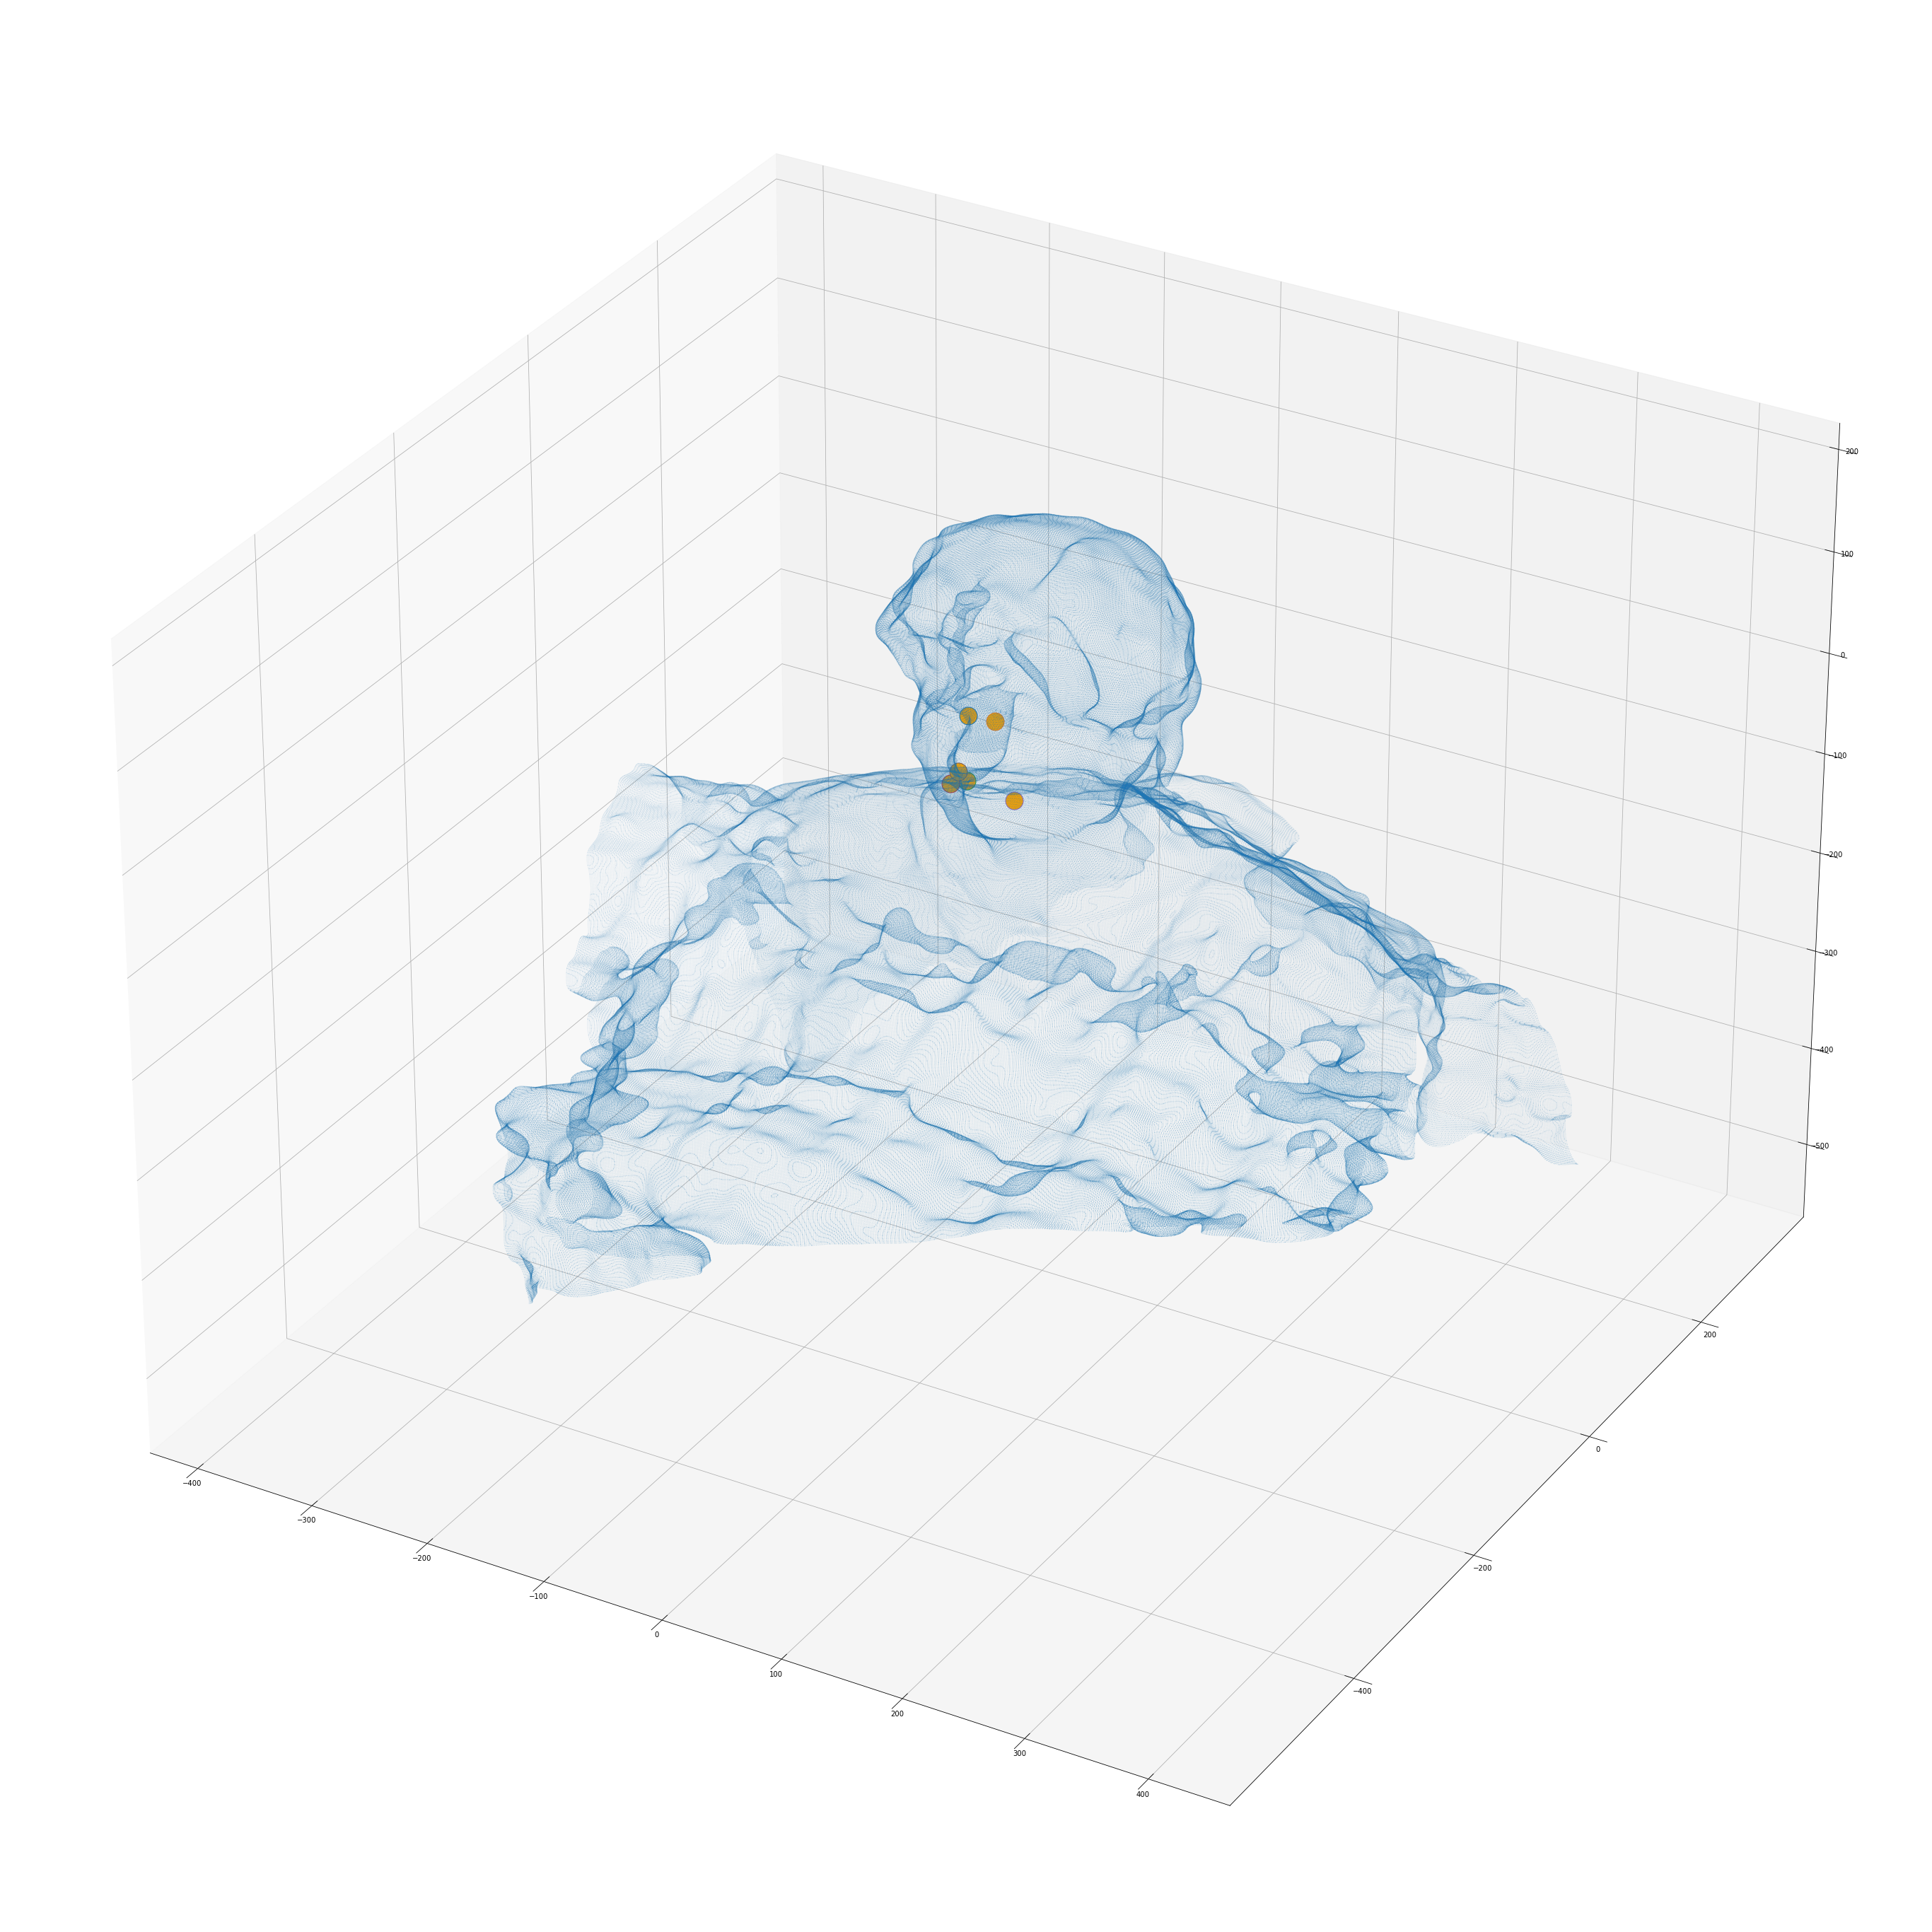

In [42]:
#%matplotlib widget
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection='3d')
#ay = plt.axes(projection='3d')
#ax = Axes3D(fig)
#ax.scatter(vertices[:,0],vertices[:,2], -(vertices[:,1]), s=0.01)#, markerfacecolor="blue", markersize=0.01)
#ax.scatter(vertices[381,0], vertices[381,2], -vertices[381,1])
ax.scatter(vertices_pred[:,0],vertices_pred[:,2], -(vertices_pred[:,1]),  s=0.01)


for idx in landmarks_idx:
    ax.plot3D(vertices_pred[idx,0], vertices_pred[idx,2], -vertices_pred[idx,1], marker="o", markerfacecolor="orange", markersize=25)


plt.show()

 


In [ ]:

#show((mesh_pred), axes=1)

In [ ]:
#mesh_gt.show()
#mesh_SWC.show()

In [ ]:
#scale = mesh_pred.extents / mesh_gt.extents
#matrix = np.eye(4)
#matrix[:2, :2] /= scale[:2]
#mesh_pred_copy = copy.deepcopy(mesh_pred)

#mesh_pred_copy.apply_transform(matrix)

#print('\nafter operation\n')
#print(mesh_pred_copy.extents)
#print(mesh_gt.extents)

#T, cost = trimesh.registration.mesh_other(mesh_pred, mesh_gt)

In [ ]:
#mesh_pred_copy.show()
#mesh_pred_trans.export('mesh_pred_trans.ply')

In [ ]:
#print(T, cost)

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred, mesh_gt)
#matrix = np.eye(4)
#P = mesh_gt.centroid - mesh_pred.centroid
#matrix[:,3] = [0, P[1], P[2], 1]
#print(matrix)
#mesh_pred_copy = copy.deepcopy(mesh_pred)
#mesh_pred_trans = mesh_pred_copy.apply_transform(matrix)

#print(mesh_pred_trans)
#transformed_mesh = trimesh.transformations.

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred_trans, mesh_gt)
#print(matrix)
#print(T)

#print(mesh_pred_trans.centroid)
#print(mesh_gt.centroid)

In [ ]:
#mesh_pred_trans = mesh_pred_trans.apply_transform(T)
#print(T, cost)

In [ ]:
#T, cost = trimesh.registration.mesh_other(mesh_pred_trans, mesh_gt)

In [ ]:
#print(T, cost)
#print(mesh_pred_trans.)

In [ ]:
#trimesh.exchange.export.export_mesh(mesh_pred_trans, 'mesh_pred_trans.ply')
#mesh_pred_trans.export('mesh_pred_trans.ply')

In [ ]:
#scenes = h3ds.scenes() # returns all the scenes ['1b2a8613401e42a8', ...]
#scenes = h3ds.scenes(tags={'h3d-net'}) # returns the scenes used in H3D-Net paper

In [ ]:
#views_configs = h3ds.default_views_configs(scene_id='1b2a8613401e42a8') # '3', '4', '8', '16' and '32'
#mesh_3, images_3, masks_3, cameras_3 = h3ds.load_scene(scene_id='1b2a8613401e42a8', views_config_id='3')
#mesh, images, masks, cameras = h3ds.load_scene(scene_id='1b2a8613401e42a8')


